In [249]:
import numpy as np
import pandas as pd


In [250]:
try:
    df = pd.read_csv('spam.csv', encoding='latin-1')  # Try 'latin-1' first
except UnicodeDecodeError:
    try:
        df = pd.read_csv('spam.csv', encoding='cp1252')  # Try 'cp1252' next
    except UnicodeDecodeError:
        # If both fail, raise the error and suggest checking the file's encoding
        raise UnicodeDecodeError("Could not decode the file. Please check the encoding of 'spam.csv'.")

In [251]:
df.sample(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3312,ham,"Huh... Hyde park not in mel ah, opps, got conf...",NaN,NaN,NaN
5065,ham,I calls you later. Afternoon onwords mtnl serv...,NaN,NaN,NaN
3670,ham,Yup. Thk of u oso boring wat.,NaN,NaN,NaN
4406,ham,"Awesome, plan to get here any time after like ...",NaN,NaN,NaN
1606,ham,Ok no prob... I'll come after lunch then...,NaN,NaN,NaN
3930,ham,Nooooooo I'm gonna be bored to death all day. ...,NaN,NaN,NaN
1012,ham,I dunno they close oredi not... ÌÏ v ma fan...,NaN,NaN,NaN
4242,ham,Okie...,NaN,NaN,NaN
5318,ham,"Good morning, my Love ... I go to sleep now an...",NaN,NaN,NaN
4235,spam,U can WIN å£100 of Music Gift Vouchers every w...,NaN,NaN,NaN


In [252]:
df.shape

(5572, 5)

In [253]:
# data cleaning
# EDA
# text preprocessing
# model building
# evolution
# improvement
# website
# deploy

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [255]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [256]:
df.sample(5)

,v1,v2
2857,ham,In life when you face choices Just toss a coin...
4025,ham,Oh ok.. Wat's ur email?
4144,ham,Lol I would but despite these cramps I like be...
3431,spam,Camera - You are awarded a SiPix Digital Camer...
480,ham,"Almost there, see u in a sec"


In [257]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [258]:
df.sample(5)

,target,text
4865,ham,"Oh! Shit, I thought that was your trip! Looooo..."
3035,ham,;-) ok. I feel like john lennon.
2725,ham,No. But we'll do medical missions to nigeria
1091,ham,Please da call me any mistake from my side sor...
419,spam,Send a logo 2 ur lover - 2 names joined by a h...


In [259]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [260]:
df['target'] = encoder.fit_transform(df['target'])

In [261]:
df.sample(5)

,target,text
3356,0,"Brainless Baby Doll..:-D;-), vehicle sariyag d..."
44,0,Great! I hope you like your man well endowed. ...
3277,0,What happened in interview?
2387,0,Also where's the piece
5186,0,I uploaded mine to Facebook


In [262]:
df.duplicated().sum()

403

In [263]:
df = df.drop_duplicates(keep='first')

In [264]:
df.duplicated().sum()

0

In [265]:
df.shape

(5169, 2)

#EDA

In [266]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [267]:
df['target'].value_counts()

,count
target,
0,4516
1,653


In [268]:
import nltk

In [269]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [270]:
df['new_charactors']=df['text'].apply(len)

<ipython-input-270-329fb822eb3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_charactors']=df['text'].apply(len)


In [271]:
df.head()

,target,text,new_charactors
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [272]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [273]:
df['new_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [274]:
df.head()

,target,text,new_charactors,new_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [275]:
df['new_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [276]:
df.head()

,target,text,new_charactors,new_words,new_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [277]:
df[['new_charactors','new_words','new_sentences']].describe()

,new_charactors,new_words,new_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [278]:
df[df['target']==0][['new_charactors','new_words','new_sentences']].describe()

,new_charactors,new_words,new_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [279]:
df[df['target']==1][['new_charactors','new_words','new_sentences']].describe()

,new_charactors,new_words,new_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [280]:
import seaborn as sns

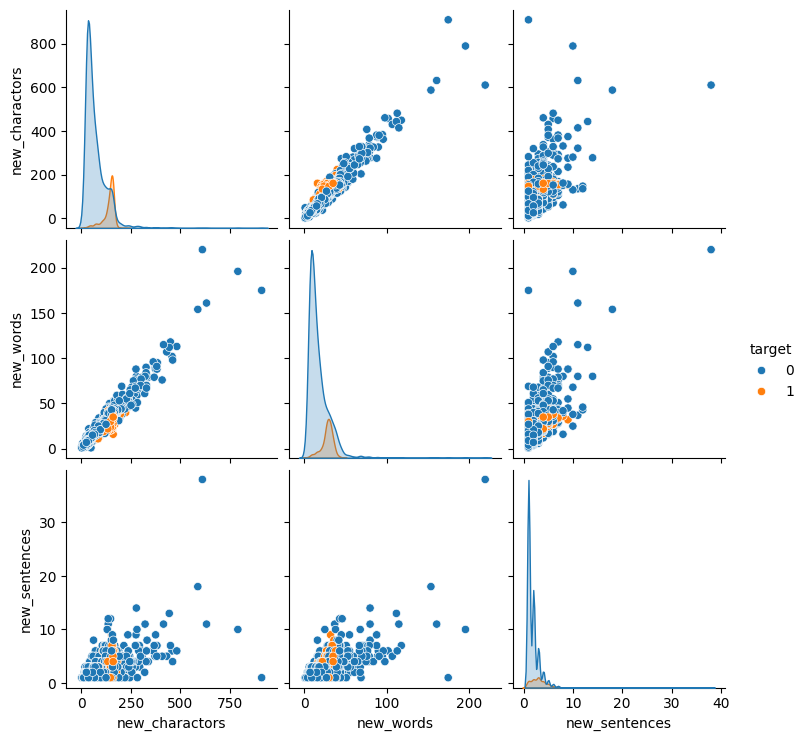

In [281]:
sns.pairplot(df,hue='target')

#data preprocessing

In [282]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [283]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [284]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [285]:
def transform_text(text):
    text = text.lower()  #lower case
    text = nltk.word_tokenize(text) #tokenize

    # remove special characters
    y = []
    for i in text:
      if i.isalnum():
        y.append(i)
    # delete stopwords and punctuations
    text = y[:]
    y.clear()
    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)
    # dancing to dance , lovers to love its called porter stemmer
    text = y[:]
    y.clear()
    for i in text:
      y.append(ps.stem(i))
    return " ".join(y)

In [286]:
transform_text('i am a good boy.who are you?.you are dansing on the buses')

'good dans buse'

In [221]:
df['transformed_text'] = df['text'].apply(transform_text)

In [222]:
df.head()

,target,text,new_charactors,new_words,new_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [223]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [224]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

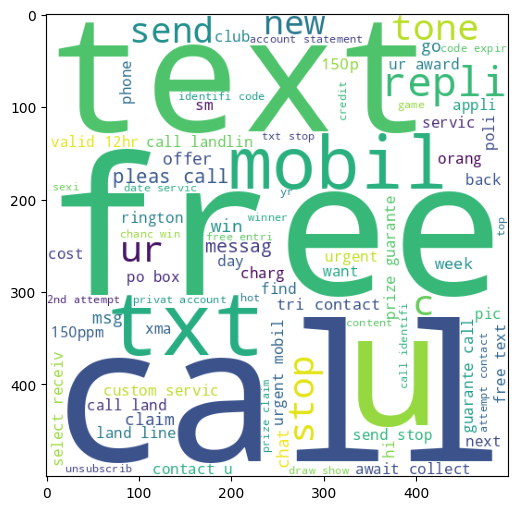

In [225]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [226]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

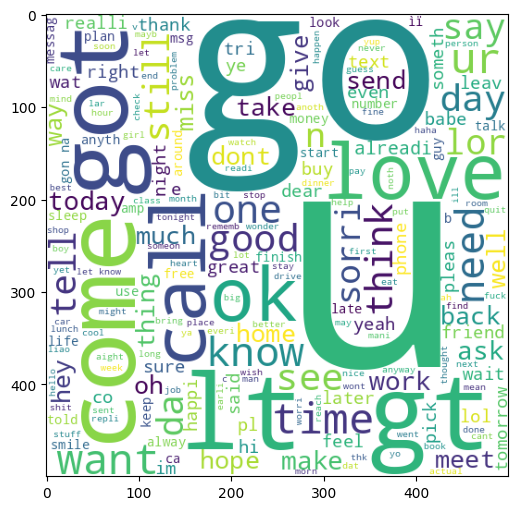

In [227]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [228]:
df.head()

,target,text,new_charactors,new_words,new_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [229]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [230]:
len(spam_corpus)

9939

In [231]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

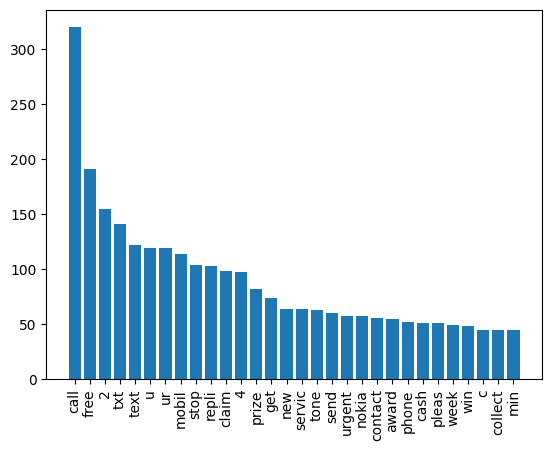

In [232]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [233]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [234]:
len(ham_corpus)

35404

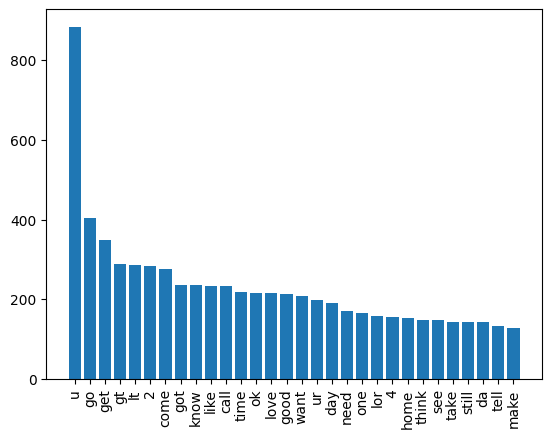

In [235]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# model building

In [236]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [237]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [238]:
x.shape

(5169, 3000)

In [239]:
y = df['target'].values

In [240]:
y.shape

(5169,)

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [242]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [243]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [244]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [245]:
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [246]:
bnb.fit(x_train,y_train)
y_pred1 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [247]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [248]:
import streamlit as st
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))
st.title("sms spam classifier")

input_sms = st.text_input("enter your message")

transformed_sms = transform_text(input_sms)
# Use transform() method with parentheses to transform the text
vector_input = tfidf.transform([transformed_sms])
result = model.predict(vector_input)[0] # Access the prediction result
if result == 1:
    st.header("spam")
else:
    st.header("not spam")

2025-01-08 20:53:56.542 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 20:53:56.550 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 20:53:56.554 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 20:53:56.558 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 20:53:56.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 20:53:56.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 20:53:56.567 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 20:53:56.568 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar